In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


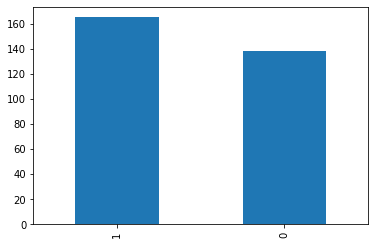

In [59]:
df['target'].value_counts().plot(kind='bar')

In [51]:
#splitting the dependent and independent variable
y = df['target']#dependet variable
X = df.drop('target',axis=1)
#axis = 0 for dropping rows
#axis = 1 for dropping columns
print(X.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [60]:
#scaling the feature. It normalises the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X) 
print(X_scaled)#numpy array created for scaled feature

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


In [61]:
#splitting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.3, shuffle =True) 
#shuffle = True 
#shuffles the data into mixed values because we have got the values sorted order
print("The trainig dataset shape:"+str(X_train.shape))
print("The testing dataset shape:"+str(X_test.shape))
print("The target datashape is:"+str(Y_train.shape)+ str(Y_test.shape))

The trainig dataset shape:(212, 13)
The testing dataset shape:(91, 13)
The target datashape is:(212,)(91,)


In [62]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, Y_train)#train the model
prediction = lr.predict(X_test)#predict the testdataset
accuracy = accuracy_score(Y_test, prediction) * 100 #calculating the accuracy
print("The accuracy from Logistic Regression is" +str(round(accuracy, 2)))

The accuracy from Logistic Regression is83.52


In [63]:
#using knn 
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 5)#the number of neighbors we want to compare
model.fit(X_train, Y_train)
predict1 = model.predict(X_test)
accuracy = accuracy_score(Y_test,predict1)
print("The accuracy from KNN classifier is" +str(round(accuracy, 2)*100))

The accuracy from KNN classifier is78.0
